In [5]:
import polars as pl


df = pl.read_csv('Boston.csv')
df.head()

CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
str,f64,f64,i64,f64,f64,f64,f64,i64,i64,f64,f64,f64
"""high""",0.0,18.1,0,0.718,3.561,87.9,1.6132,24,666,20.2,7.12,27.5
"""low""",0.0,8.14,0,0.538,5.95,82.0,3.99,4,307,21.0,27.71,13.2
"""very_low""",82.5,2.03,0,0.415,6.162,38.4,6.27,2,348,14.7,7.43,24.1
"""low""",0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,18.46,17.8
"""high""",0.0,18.1,0,0.614,6.98,67.6,2.5329,24,666,20.2,11.66,29.8


Name: polars
Version: 1.6.0
Summary: Blazingly fast DataFrame library
Home-page: 
Author: 
Author-email: Ritchie Vink <ritchie46@gmail.com>
License: 
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
df.get_column('CRIME').value_counts()

CRIME,count
str,u32
"""very_low""",50
"""low""",25
"""high""",25


In [17]:
crime = df.select('CRIME').to_dummies(drop_first=True)
df2 = pl.concat([df,crime], how="horizontal").drop('CRIME')
df2.head()

ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,CRIME_low,CRIME_very_low
f64,f64,i64,f64,f64,f64,f64,i64,i64,f64,f64,f64,u8,u8
0.0,18.1,0,0.718,3.561,87.9,1.6132,24,666,20.2,7.12,27.5,0,0
0.0,8.14,0,0.538,5.95,82.0,3.99,4,307,21.0,27.71,13.2,1,0
82.5,2.03,0,0.415,6.162,38.4,6.27,2,348,14.7,7.43,24.1,0,1
0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,18.46,17.8,1,0
0.0,18.1,0,0.614,6.98,67.6,2.5329,24,666,20.2,11.66,29.8,0,0


In [21]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df2, test_size=0.2, random_state=0)

In [23]:
train_val.null_count()

ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,CRIME_low,CRIME_very_low
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
train_val2 = train_val.fill_null(strategy='mean')

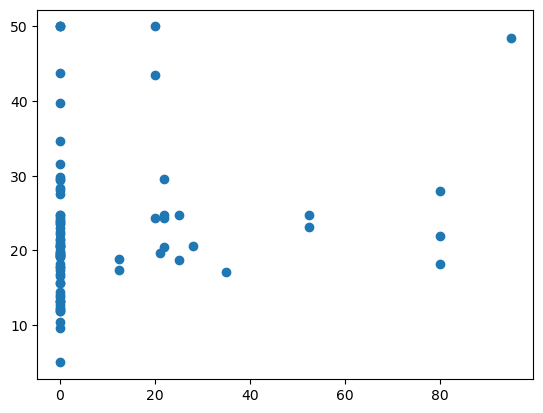

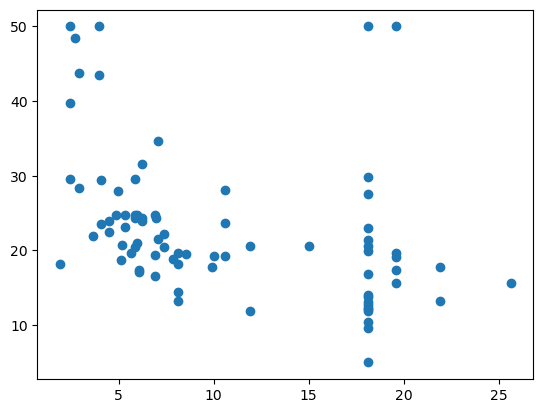

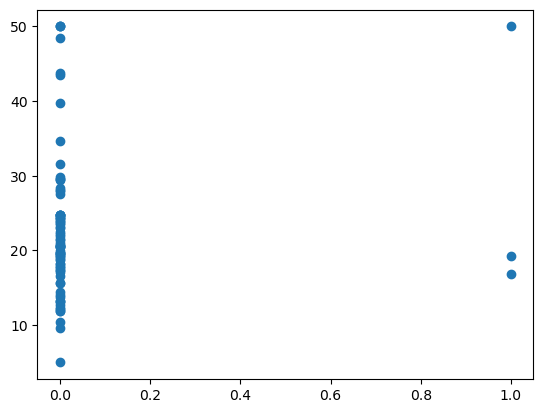

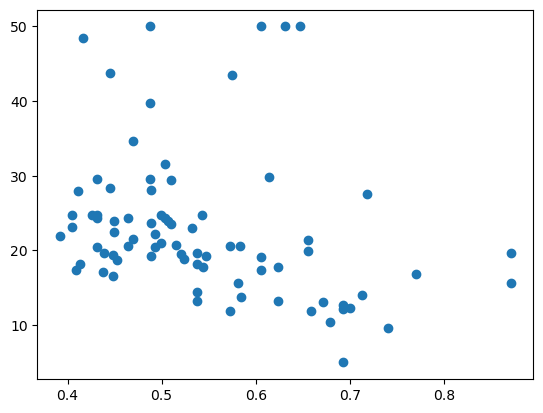

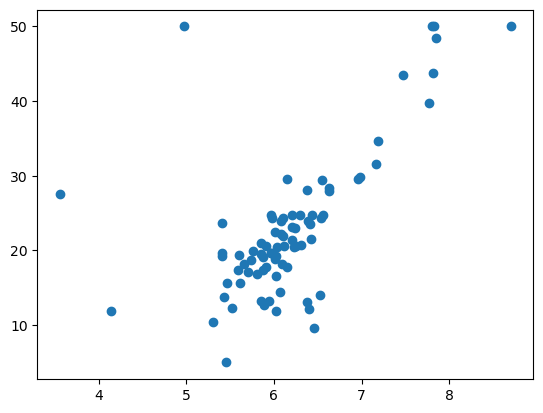

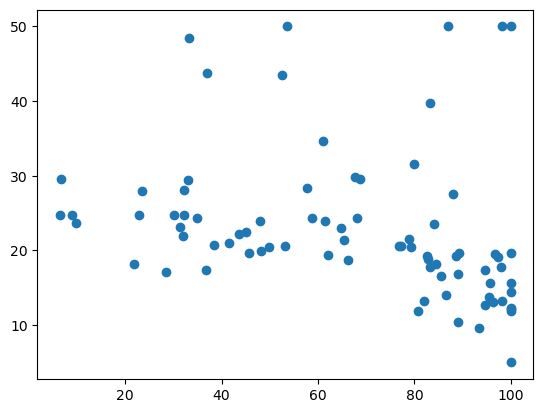

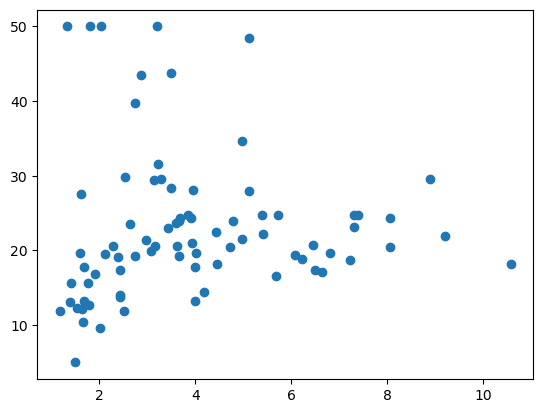

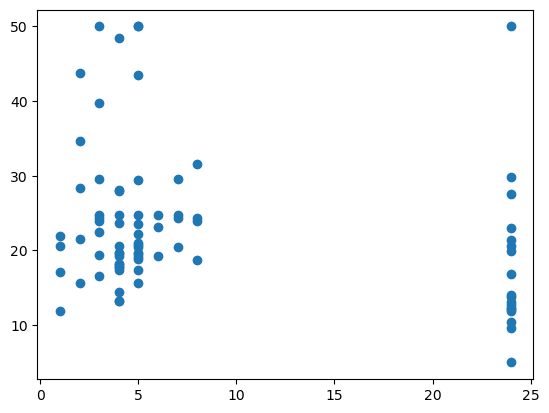

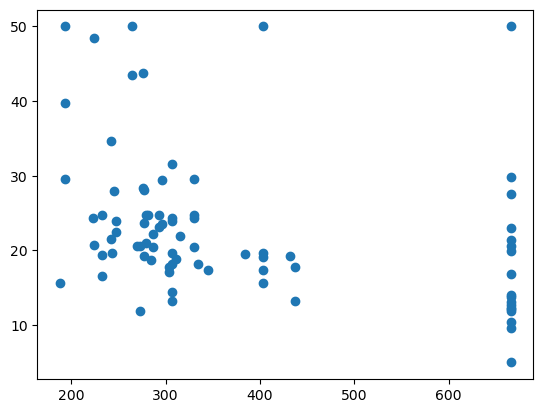

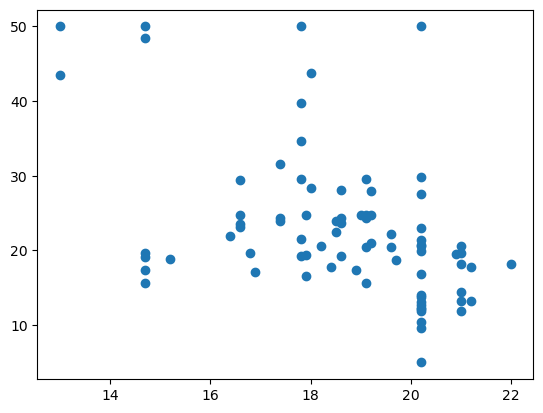

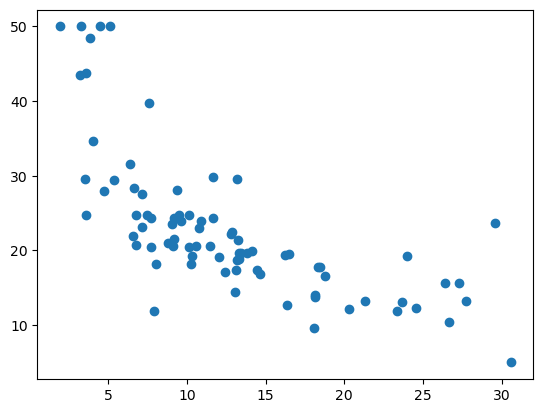

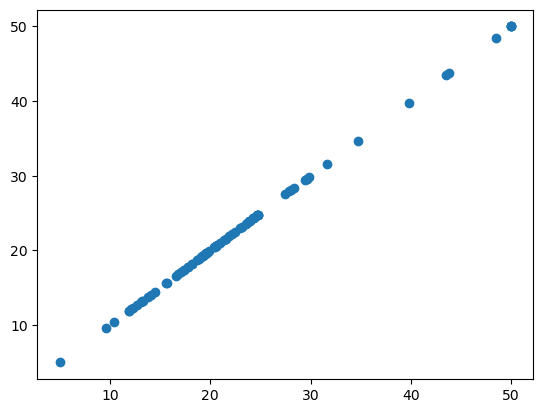

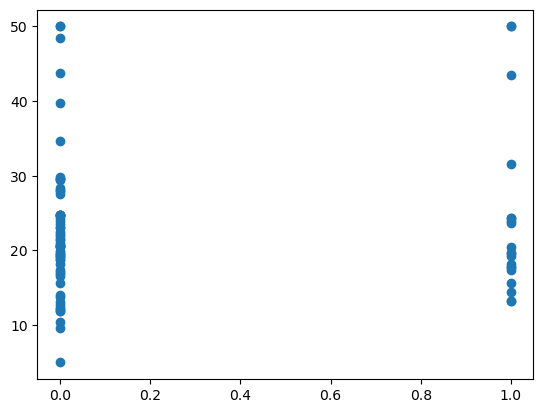

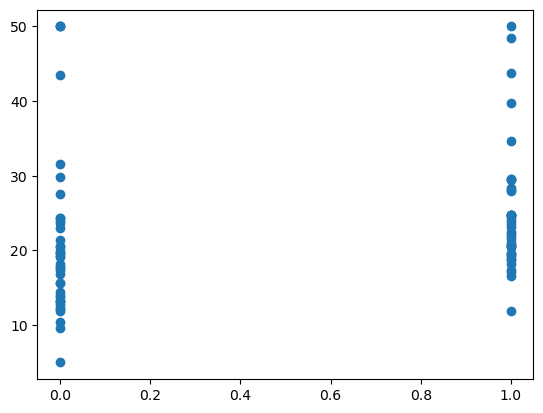

In [29]:
import matplotlib.pyplot as plt

for col in train_val2.columns:
    plt.scatter(train_val2.get_column(col), train_val2.get_column('PRICE'))
    plt.show()

In [43]:
out_line1 = (pl.col('RM') < 6) & (pl.col('PRICE') > 40) 

out_line2 = (pl.col('RM') > 18) & (pl.col('PRICE') > 40) 



train_val3 = train_val2.filter(
    ~(out_line1) & ~(out_line2)
)

train_val4 = train_val3.select(
    ['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT', 'PRICE']
)
train_val4.head()

INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
f64,f64,f64,f64,f64,f64
5.86,0.431,6.108,19.1,9.16,24.3
5.86,0.431,6.957,19.1,3.53,29.6
21.89,0.624,6.151,21.2,18.46,17.8
3.64,0.392,6.108,16.4,6.57,21.9
5.64,0.439,5.963,16.8,13.45,19.7


In [65]:
train_val4.corr().select(
    pl.col('PRICE').map_elements(abs, return_dtype=pl.Float32).alias("corr")
).with_columns(
    pl.Series(train_val4.columns).alias("col")
).sort("corr", descending=True)

corr,col
f32,str
1.0,"""PRICE"""
0.753771,"""RM"""
0.693491,"""LSTAT"""
0.542449,"""PTRATIO"""
0.470889,"""INDUS"""
0.325289,"""NOX"""


In [ ]:
train_val4.with_columns

In [73]:
train_val3.select(
    
        ['RM', 'PTRATIO', 'LSTAT', 'INDUS',
            (pl.col('RM')**2).alias("RM^2")
        ]
    
)

RM,PTRATIO,LSTAT,INDUS,RM^2
f64,f64,f64,f64,f64
6.108,19.1,9.16,5.86,37.307664
6.957,19.1,3.53,5.86,48.399849
6.151,21.2,18.46,21.89,37.834801
6.108,16.4,6.57,3.64,37.307664
5.963,16.8,13.45,5.64,35.557369
…,…,…,…,…
5.759,20.2,14.13,18.1,33.166081
6.31,20.2,6.75,5.19,39.8161
6.249,18.2,10.59,15.04,39.050001


In [79]:
data = train_val3.select(
    
        ['RM', 'PTRATIO', 'LSTAT', 'INDUS',
            
        ]
    
)
pl.concat([data]).shape

(79, 4)

In [109]:
simple_data = pl.DataFrame([{
                "A":1.0,
               "B":1.0,
               "C":1.0,
               "D":1.0}],
            )
simple_data.columns = data.columns
pl.concat([data, simple_data])

RM,PTRATIO,LSTAT,INDUS
f64,f64,f64,f64
6.108,19.1,9.16,5.86
6.957,19.1,3.53,5.86
6.151,21.2,18.46,21.89
6.108,16.4,6.57,3.64
5.963,16.8,13.45,5.64
…,…,…,…
6.31,20.2,6.75,5.19
6.249,18.2,10.59,15.04
6.625,18.0,6.65,2.89


In [113]:
train_val3.select(
    
        ['RM', 'PTRATIO', 'LSTAT', 'INDUS',
            (pl.col('RM')**2).alias("RM^2"),
            (pl.col('RM') * pl.col("LSTAT")).alias("RM*lstat"),
         pl.col("RM").cast(pl.Int64).alias("rm_int")
         
        ]
    
)

RM,PTRATIO,LSTAT,INDUS,RM^2,RM*lstat,rm_int
f64,f64,f64,f64,f64,f64,i64
6.108,19.1,9.16,5.86,37.307664,55.94928,6
6.957,19.1,3.53,5.86,48.399849,24.55821,6
6.151,21.2,18.46,21.89,37.834801,113.54746,6
6.108,16.4,6.57,3.64,37.307664,40.12956,6
5.963,16.8,13.45,5.64,35.557369,80.20235,5
…,…,…,…,…,…,…
5.759,20.2,14.13,18.1,33.166081,81.37467,5
6.31,20.2,6.75,5.19,39.8161,42.5925,6
6.249,18.2,10.59,15.04,39.050001,66.17691,6


In [129]:
df = pl.DataFrame({
    "group": ["A", "A", "B", "B", "C", "C"],
    "value": [10, 20, 30, 40, 50, 60]
})

# # グループごとの平均を計算
df_with_avg = df.with_columns(
    pl.col("value").mean().over("group").alias("group_avg")
)

df_with_avg

group,value,group_avg
str,i64,f64
"""A""",10,15.0
"""A""",20,15.0
"""B""",30,35.0
"""B""",40,35.0
"""C""",50,55.0
"""C""",60,55.0


In [137]:
import polars as pl
df = pl.DataFrame({
    "group": ["A", "A", "B", "B", "C", "C"],
    "value": [10, 20, 30, 40, 50, 60]
})
df.head(2)

group,value
str,i64
"""A""",10
"""A""",20
